# Imports

In [1]:
import main as code
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm.auto import trange

sns.set()

# Utils

In [2]:
def around(x):  # cos round(1.5) == 1 for inbuilt round func
    return np.array([(x + 0.5)], dtype=int)

# Params

In [3]:
params = {
    "amin": 75,
    "amax": 90, 
    "bmin": 500,
    "bmax": 600, 
    "p1": 0.1,
    "p2": 0.01,
    "p3": 0.3,
}

cmin = dmin = 0
cmax = params["amax"] + params["bmax"]
dmax = 2 * (params["amax"] + params["bmax"])

a_sup = np.arange(params["amin"], params["amax"] + 1,)
b_sup = np.arange(params["bmin"], params["bmax"] + 1,)
c_sup = np.arange(cmin, cmax + 1)
d_sup = np.arange(dmin, dmax + 1)

# Model 1

In [4]:
def expectation(dist, val):
    return dist.T @ val 


def variance(dist, val):
    return dist.T @ (val ** 2) - expectation(dist, val) ** 2

## Expectation and variance of p(a), p(b), p(c) and p(d)

In [5]:
for model in (1,2):
    print(model)
    E = expectation(*code.pa(params, model))
    D = variance(*code.pa(params, model))
    print(f"E[a] = {E} | D[a] = {D}")

    E = expectation(*code.pb(params, model))
    D = variance(*code.pb(params, model))
    print(f"E[b] = {E} | D[b] = {D}")

    E = expectation(*code.pc(params, model))
    D = variance(*code.pc(params, model))
    print(f"E[c] = {E} | D[c] = {D}")

    E = expectation(*code.pd(params, model))
    D = variance(*code.pd(params, model))
    print(f"E[d] = {E} | D[d] = {D}")

1
E[a] = 82.5 | D[a] = 21.25
E[b] = 549.9999999999999 | D[b] = 850.0000000001164
E[c] = 13.749999999999902 | D[c] = 13.16750000000107
E[d] = 17.87499999999988 | D[d] = 25.140575000001604
2
E[a] = 82.5 | D[a] = 21.25
E[b] = 549.9999999999999 | D[b] = 850.0000000001164
E[c] = 13.75 | D[c] = 14.047500000000014
E[d] = 17.875000000000004 | D[d] = 26.62777499999993


In [6]:
for model in (1,2):
    print(model)
    
    Ea = around(expectation(*code.pa(params, model)))
    Eb = around(expectation(*code.pb(params, model)))
    Ed = around(expectation(*code.pd(params, model)))
    
    Ec = expectation(*code.pc(params, model))
    Dc = variance(*code.pc(params, model))
    print(f"E[c] = {Ec} | D[c] = {Dc}")

    pc_a = code.pc_a(Ea, params, model)
    Ec_a = expectation(*pc_a)
    Dc_a = variance(*pc_a)
    print(f"E[c|a] = {Ec_a.item()} | D[c|a] = {Dc_a[0].item()}")

    pc_b = code.pc_b(Eb, params, model)
    Ec_b = expectation(*pc_b)
    Dc_b = variance(*pc_b)
    print(f"E[c|b] = {Ec_b.item()} | D[c|b] = {Dc_b.item()}")

    pc_d = code.pc_d(Ed, params, model)
    Ec_d = expectation(*pc_d)
    Dc_d = variance(*pc_d)
    print(f"E[c|d] = {Ec_d.item()} | D[c|d] = {Dc_d.item()}")

    pc_ab = code.pc_ab(Ea, Eb, params, model)
    Ec_ab = expectation(*pc_ab)
    Dc_ab = variance(*pc_ab)
    print(f"E[c|ab] = {Ec_ab.item()} | D[c|ab] = {Dc_ab.item()}")

    pc_abd = code.pc_abd(Ea, Eb, Ed, params, model)
    Ec_abd = expectation(*pc_abd)
    Dc_abd = variance(*pc_abd)
    print(f"E[c|abd] = {Ec_abd.item()} | D[c|abd] = {Dc_abd.item()}")

1
E[c] = 13.749999999999902 | D[c] = 13.16750000000107
E[c|a] = 13.799999999999898 | D[c|a] = 13.000000000000995
E[c|b] = 13.750000000000348 | D[c|b] = 13.082499999995775
E[c|d] = 13.895970598988923 | D[c|d] = 1.5335817006728405
E[c|ab] = 13.800000000000345 | D[c|ab] = 12.9149999999957
E[c|abd] = 13.902755594358712 | D[c|abd] = 1.5301402085201232
2
E[c] = 13.75 | D[c] = 14.047500000000014
E[c|a] = 13.800000000000004 | D[c|a] = 13.884999999999962
E[c|b] = 13.750000000000002 | D[c|b] = 13.962499999999977
E[c|d] = 13.893833892236305 | D[c|d] = 1.5439433290955833
E[c|ab] = 13.800000000000008 | D[c|ab] = 13.799999999999898
E[c|abd] = 13.900175167039482 | D[c|abd] = 1.5408838495818884


## p(c), p(c|a), p(c|b), p(c|d), p(c|ab), p(c|abd)

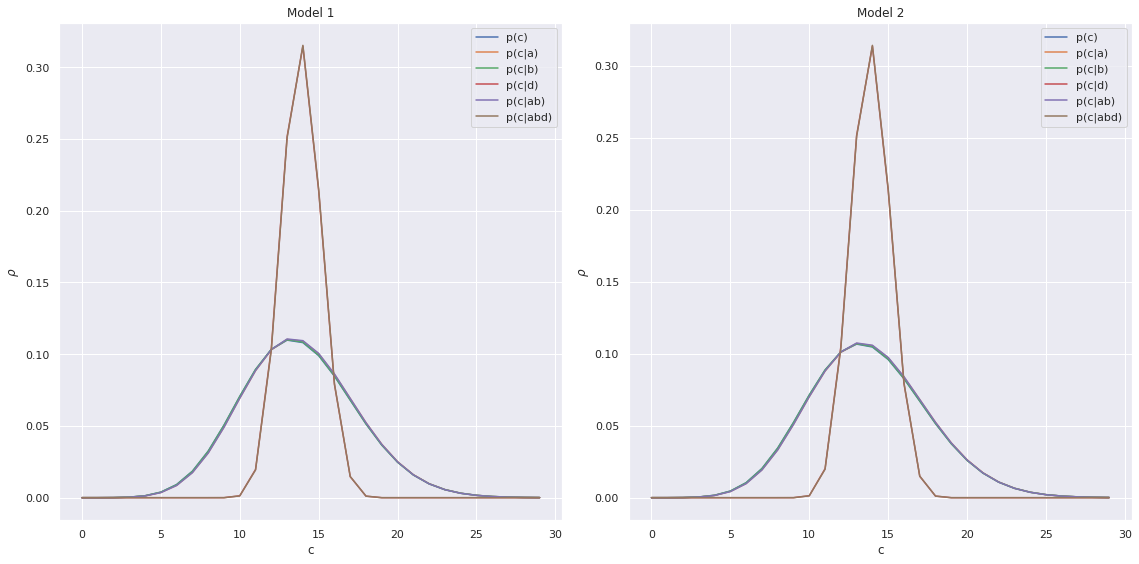

In [7]:
fig, axs = plt.subplots(1,2, figsize=(16, 8))
for model in (1,2):
    Ea = around(expectation(*code.pa(params, model)))
    Eb = around(expectation(*code.pb(params, model)))
    Ed = around(expectation(*code.pd(params, model)))
    
    pc, x = code.pc(params, model)
    pc_a, _ = code.pc_a(Ea, params, model)
    pc_b, _ = code.pc_b(Eb, params, model)
    pc_d, _ = code.pc_d(Ed, params, model)
    pc_ab, _ = code.pc_ab(Ea, Eb, params, model)
    pc_abd, _ = code.pc_abd(Ea, Eb, Ed, params, model)

    cut = 30

    axs[model-1].plot(x[:cut], pc[:cut], label="p(c)")
    axs[model-1].plot(x[:cut], pc_a.flatten()[:cut], label="p(c|a)")
    axs[model-1].plot(x[:cut], pc_b.flatten()[:cut], label="p(c|b)")
    axs[model-1].plot(x[:cut], pc_d.flatten()[:cut], label="p(c|d)")
    axs[model-1].plot(x[:cut], pc_ab.flatten()[:cut], label="p(c|ab)")
    axs[model-1].plot(x[:cut], pc_abd.flatten()[:cut], label="p(c|abd)")
    
    axs[model-1].set_xlabel('c')
    axs[model-1].set_ylabel("$\\rho$")

    axs[model-1].legend()
    axs[model-1].set_title(f'Model {model}')

fig.tight_layout()
fig.savefig("3_1.png")


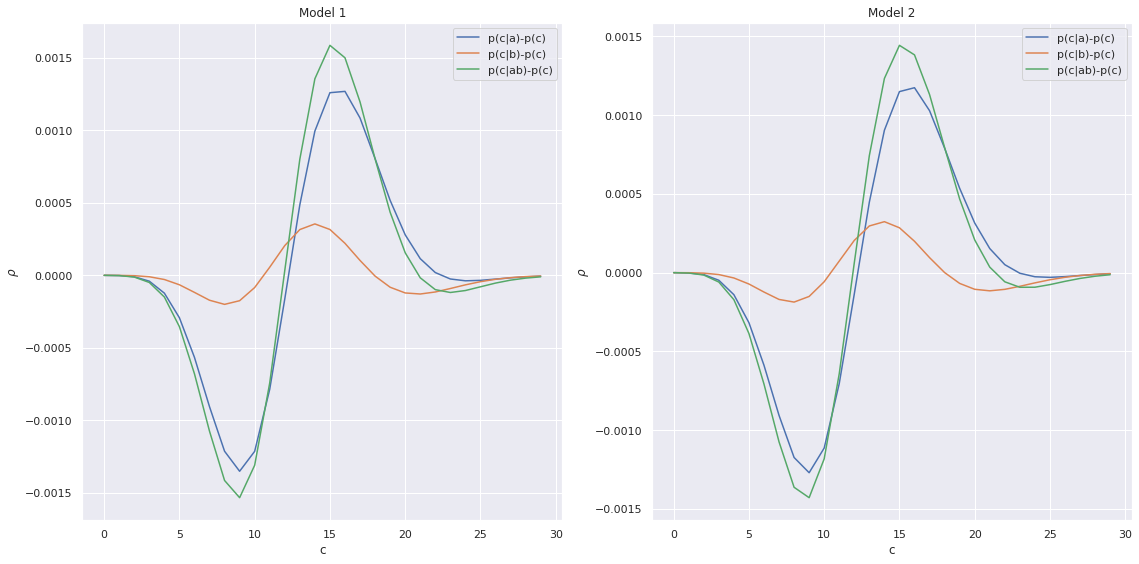

In [8]:
fig, axs = plt.subplots(1,2, figsize=(16, 8))
for model in (1,2):
    Ea = around(expectation(*code.pa(params, model)))
    Eb = around(expectation(*code.pb(params, model)))
    Ed = around(expectation(*code.pd(params, model)))
    
    pc, x = code.pc(params, model)
    pc_a, _ = code.pc_a(Ea, params, model)
    pc_b, _ = code.pc_b(Eb, params, model)
    pc_d, _ = code.pc_d(Ed, params, model)
    pc_ab, _ = code.pc_ab(Ea, Eb, params, model)
    pc_abd, _ = code.pc_abd(Ea, Eb, Ed, params, model)

    cut = 30

    axs[model-1].plot(x[:cut], pc_a.flatten()[:cut]- pc[:cut], label="p(c|a)-p(c)")
    axs[model-1].plot(x[:cut], pc_b.flatten()[:cut]- pc[:cut], label="p(c|b)-p(c)")
    axs[model-1].plot(x[:cut], pc_ab.flatten()[:cut]- pc[:cut], label="p(c|ab)-p(c)")
    
    axs[model-1].set_xlabel('c')
    axs[model-1].set_ylabel("$\\rho$")

    axs[model-1].legend()
    axs[model-1].set_title(f'Model {model}')
    
fig.tight_layout()
fig.savefig("3_2.png")


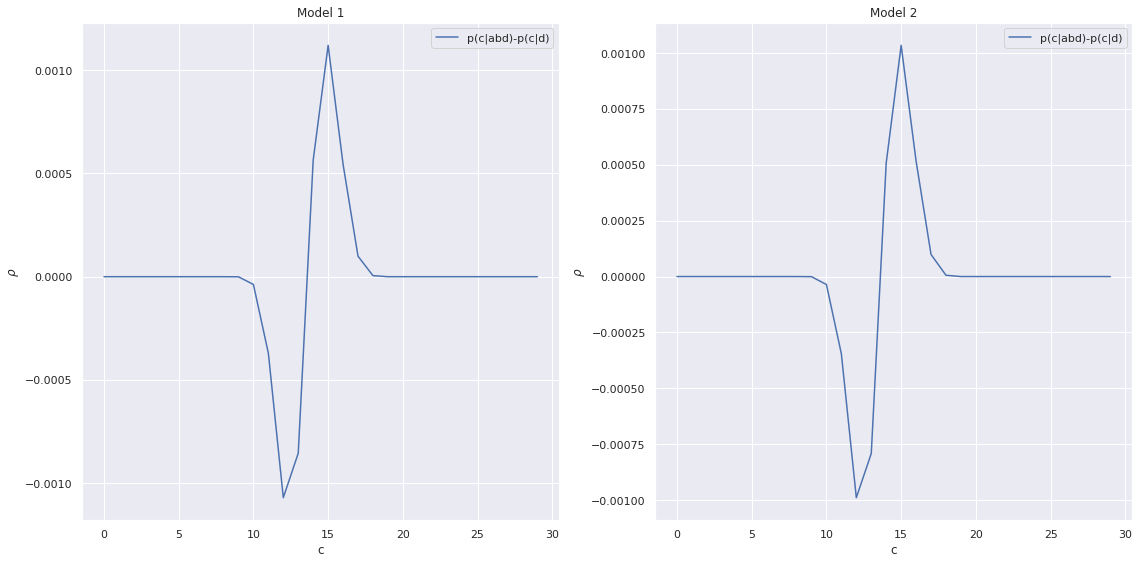

In [9]:
fig, axs = plt.subplots(1,2, figsize=(16, 8))
for model in (1,2):
    Ea = around(expectation(*code.pa(params, model)))
    Eb = around(expectation(*code.pb(params, model)))
    Ed = around(expectation(*code.pd(params, model)))
    
    pc, x = code.pc(params, model)
    pc_a, _ = code.pc_a(Ea, params, model)
    pc_b, _ = code.pc_b(Eb, params, model)
    pc_d, _ = code.pc_d(Ed, params, model)
    pc_ab, _ = code.pc_ab(Ea, Eb, params, model)
    pc_abd, _ = code.pc_abd(Ea, Eb, Ed, params, model)

    cut = 30

    axs[model-1].plot(x[:cut], pc_abd.flatten()[:cut]- pc_d.flatten()[:cut], label="p(c|abd)-p(c|d)")
    
    axs[model-1].set_xlabel('c')
    axs[model-1].set_ylabel("$\\rho$")

    axs[model-1].legend()
    axs[model-1].set_title(f'Model {model}')
    
fig.tight_layout()
fig.savefig("3_3.png")


# Model 2

## 4.

### D[c|d] < D[c|b] and D[c|d] < D[c|a]??? 

In [11]:
list(zip(Dc_a,Dc_b))

[(13.08500000000015, 13.462500000000176),
 (13.184999999999803, 13.472500000000053),
 (13.284999999999997, 13.482500000000073),
 (13.384999999999792, 13.492500000000064),
 (13.484999999999815, 13.502499999999998),
 (13.585000000000349, 13.512500000000074),
 (13.684999999999775, 13.522499999999866),
 (13.785000000000139, 13.532499999999885),
 (13.884999999999934, 13.542499999999848),
 (13.985000000000241, 13.552499999999952),
 (14.08499999999998, 13.5625),
 (14.185000000000201, 13.572499999999991),
 (14.284999999999883, 13.582500000000095),
 (14.384999999999962, 13.592499999999916),
 (14.485000000000042, 13.60250000000002),
 (14.584999999999809, 13.612500000000097)]

/home/stas/Documents/HSE/BMMO/Practice_1/main.py:126: RuntimeWarning: invalid value encountered in true_divide
  prob /= (np.sum(prob, axis=1, keepdims=True))
/home/stas/Documents/HSE/BMMO/Practice_1/main.py:126: RuntimeWarning: invalid value encountered in true_divide
  prob /= (np.sum(prob, axis=1, keepdims=True))


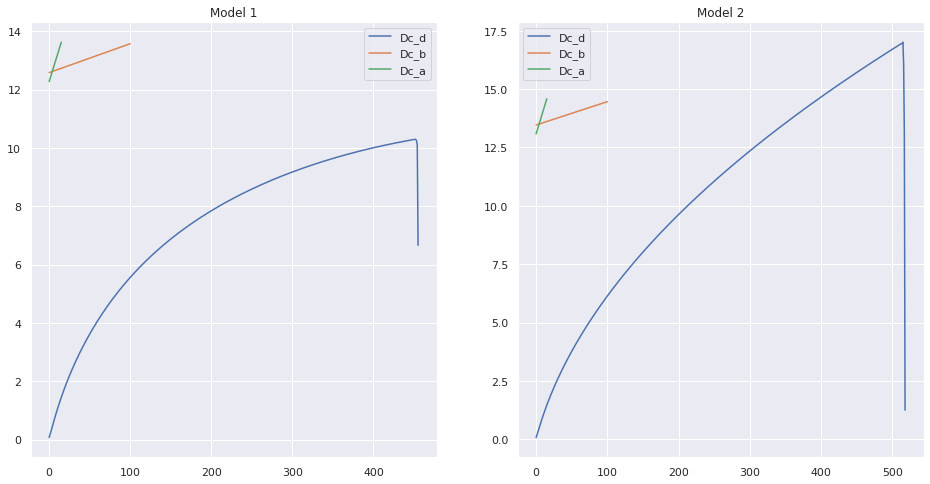

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
for model in (1,2):
    a = np.arange(params["amin"], params["amax"] + 1)
    b = np.arange(params["bmin"], params["bmax"] + 1)
    d = np.arange(0, 2 * (params["amax"] + params["bmax"]) + 1)

    Dc_d = variance(*code.pc_d(d, params, model))
    Dc_a = variance(*code.pc_a(a, params, model))
    Dc_b = variance(*code.pc_b(b, params, model))

    Dc_d = Dc_d[Dc_d>0]
    axs[model-1].plot(Dc_d, label='Dc_d')
    axs[model-1].plot(Dc_b, label='Dc_b')
    axs[model-1].plot(Dc_a, label='Dc_a')
    axs[model-1].legend()
    axs[model-1].set_title(f'Model {model}')
    
fig.savefig(f"4_1.png")

/home/stas/Documents/HSE/BMMO/Practice_1/main.py:126: RuntimeWarning: invalid value encountered in true_divide
  prob /= (np.sum(prob, axis=1, keepdims=True))
/home/stas/Documents/HSE/BMMO/Practice_1/main.py:126: RuntimeWarning: invalid value encountered in true_divide
  prob /= (np.sum(prob, axis=1, keepdims=True))


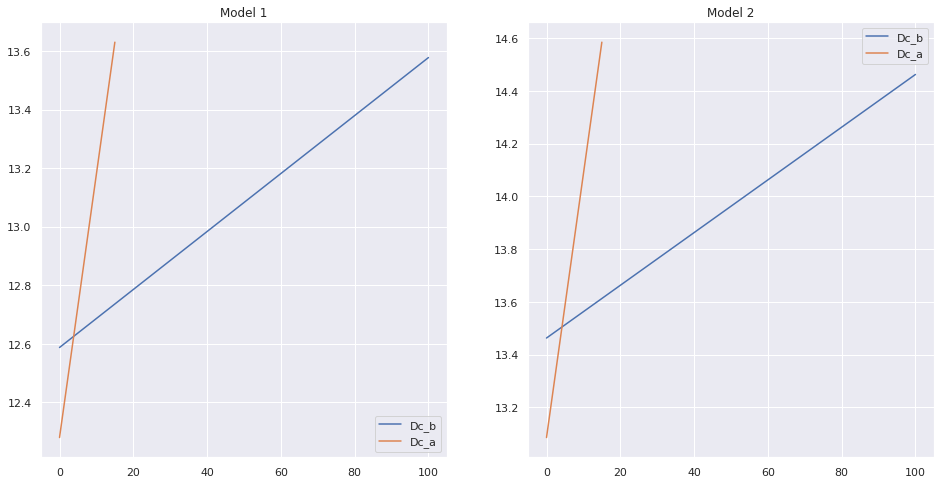

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
for model in (1,2):
    a = np.arange(params["amin"], params["amax"] + 1)
    b = np.arange(params["bmin"], params["bmax"] + 1)
    d = np.arange(0, 2 * (params["amax"] + params["bmax"]) + 1)

    Dc_d = variance(*code.pc_d(d, params, model))
    Dc_a = variance(*code.pc_a(a, params, model))
    Dc_b = variance(*code.pc_b(b, params, model))

    Dc_d = Dc_d[Dc_d>0]
#     axs[model-1].plot(Dc_d, label='Dc_d')
    axs[model-1].plot(Dc_b, label='Dc_b')
    axs[model-1].plot(Dc_a, label='Dc_a')
    axs[model-1].legend()
    axs[model-1].set_title(f'Model {model}')
    
fig.savefig(f"4_1.png")

### Linear separability

In [16]:
Dc_d.shape

(519,)

/home/stas/Documents/HSE/BMMO/Practice_1/main.py:126: RuntimeWarning: invalid value encountered in true_divide
  prob /= (np.sum(prob, axis=1, keepdims=True))
/home/stas/Documents/HSE/BMMO/Practice_1/main.py:126: RuntimeWarning: invalid value encountered in true_divide
  prob /= (np.sum(prob, axis=1, keepdims=True))


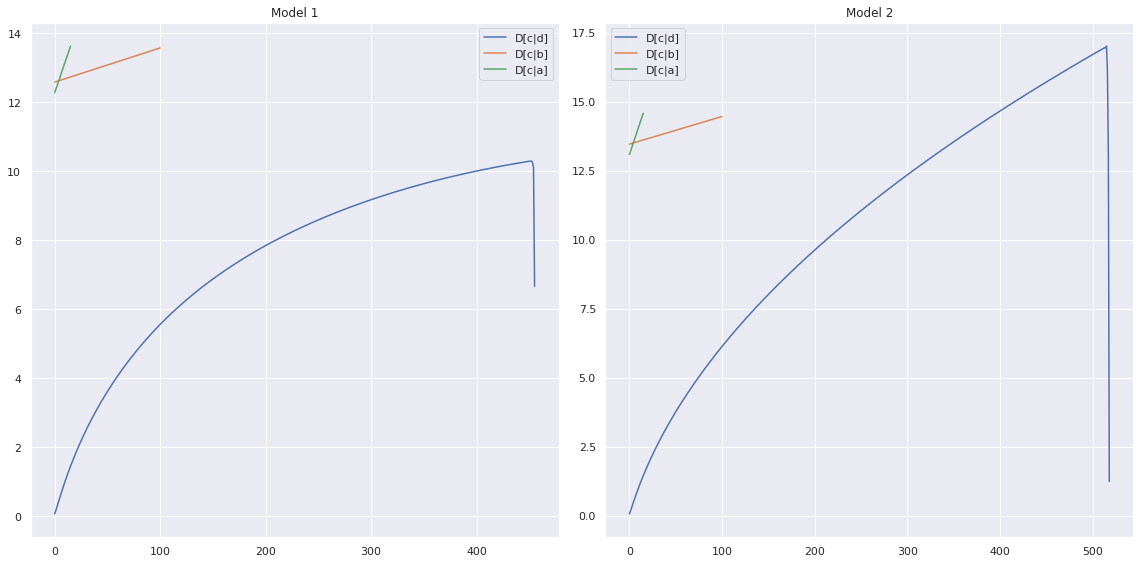

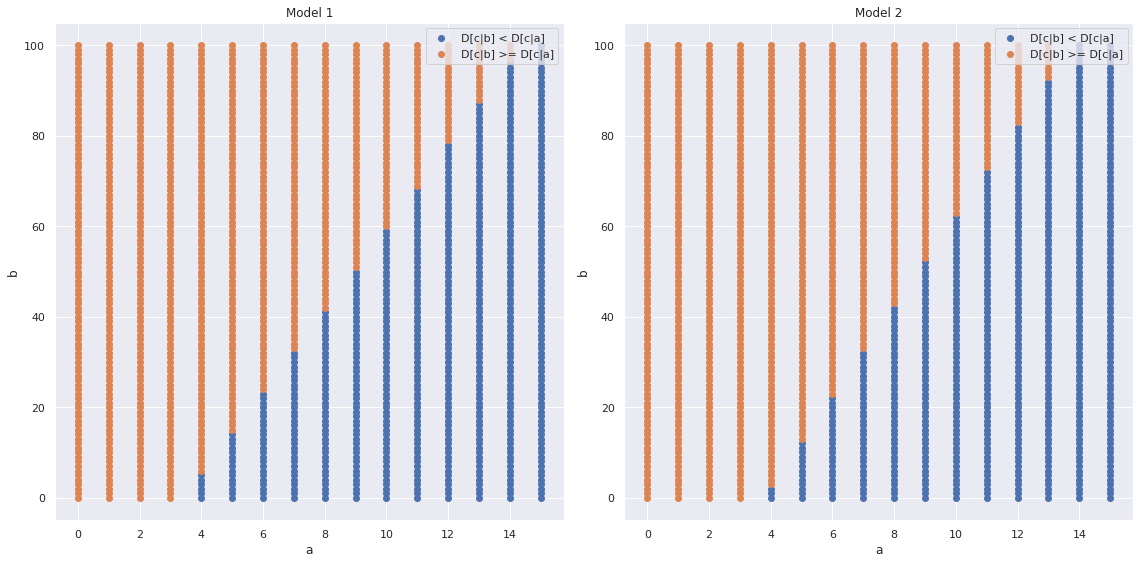

In [15]:
fig1, axs1 = plt.subplots(1, 2, figsize=(16, 8))
fig2, axs2 = plt.subplots(1, 2, figsize=(16, 8))
for model in (1,2):
    a = np.arange(params["amin"], params["amax"] + 1)
    b = np.arange(params["bmin"], params["bmax"] + 1)
    d = np.arange(0, 2 * (params["amax"] + params["bmax"]) + 1)

    Dc_d = variance(*code.pc_d(d, params, model))
    Dc_a = variance(*code.pc_a(a, params, model))
    Dc_b = variance(*code.pc_b(b, params, model))

    Dc_d = Dc_d[Dc_d>0]
    axs1[model-1].plot(Dc_d, label='D[c|d]')
    axs1[model-1].plot(Dc_b, label='D[c|b]')
    axs1[model-1].plot(Dc_a, label='D[c|a]')
    axs1[model-1].legend()
    axs1[model-1].set_title(f'Model {model}')
    
    left, right = [], []

    for a_ in range(a.size):
        for b_ in range(b.size):
            if Dc_b[b_] < Dc_a[a_]:
                left.append((a_, b_))
            else:
                right.append((a_, b_))

    left = np.array(left)
    right = np.array(right)
    
    
    axs2[model-1].scatter(left[:, 0], left[:, 1], label="D[c|b] < D[c|a]")
    axs2[model-1].scatter(right[:, 0], right[:, 1], label="D[c|b] >= D[c|a]")

    axs2[model-1].set_xlabel("a")
    axs2[model-1].set_ylabel("b")
    
    axs2[model-1].legend()
    axs2[model-1].set_title(f'Model {model}')
    
fig1.tight_layout()   
fig1.savefig(f"4_1.png")

fig2.tight_layout()   
fig2.savefig(f"4_2.png")

## Time

Берем всевозможные допустимые значения для `a, b` и `d`, будем замерять время сразу на всего набора.

In [12]:
model = 1

In [13]:
a = np.arange(params["amin"], params["amax"] + 1)
b = np.arange(params["bmin"], params["bmax"] + 1)
d = np.arange(0, 2 * (params["amax"] + params["bmax"]) + 1)

In [14]:
%%timeit
code.pc(params, model)

77.1 ms ± 6.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%%timeit
code.pc_a(a, params, model)

72 ms ± 5.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%%timeit
code.pc_b(b, params, model)

73 ms ± 3.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%%timeit
code.pc_d(d, params, model)

/home/stas/Documents/HSE/BMMO/Practice_1/main.py:126: RuntimeWarning: invalid value encountered in true_divide
  prob /= (np.sum(prob, axis=1, keepdims=True))


146 ms ± 4.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%%timeit
code.pc_ab(a, b, params, model)

72.4 ms ± 6.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%%timeit
for a_ in a:
    code.pc_abd(np.array([a_]), b, d, params, model)

/home/stas/Documents/HSE/BMMO/Practice_1/main.py:164: RuntimeWarning: invalid value encountered in true_divide
  prob = (LP / evid[:, None, :, :]).transpose(1, 2, 3, 0)


7.6 s ± 41.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
# %%timeit
# code.pc_abd(a, b, d, params, model)

In [21]:
%%timeit
code.pd(params, model)

142 ms ± 3.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
model = 2

In [23]:
a = np.arange(params["amin"], params["amax"] + 1)
b = np.arange(params["bmin"], params["bmax"] + 1)
d = np.arange(0, 2 * (params["amax"] + params["bmax"]) + 1)

In [24]:
%%timeit
code.pc(params, model)

83.6 ms ± 5.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
%%timeit
code.pc_a(a, params, model)

81.8 ms ± 3.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
%%timeit
code.pc_b(b, params, model)

84.9 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%%timeit
code.pc_d(d, params, model)

157 ms ± 5.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
%%timeit
code.pc_ab(a, b, params, model)

82.4 ms ± 4.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
%%timeit
for a_ in a:
    code.pc_abd(np.array([a_]), b, d, params, model)

7.7 s ± 48.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
# %%timeit
# code.pc_abd(a, b, d, params, model)

In [31]:
%%timeit
code.pd(params, model)

145 ms ± 3.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
